In [549]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
import scipy
import datetime
import seaborn as sn
from collections import Counter
import re
from itertools import chain

In [211]:
dat= pd.read_csv('TopCharts_complete.csv')

In [212]:
print(dat.head())

   Unnamed: 0  rank            artist                                title  \
0           0     1             Migos  Bad and Boujee (feat. Lil Uzi Vert)   
1           1     2             Drake                            Fake Love   
2           2     3        The Weeknd                              Starboy   
3           3     4  The Chainsmokers                               Closer   
4           4     5      Rae Sremmurd                        Black Beatles   

     streams        date  danceability  energy   key  loudness  mode  \
0  1,371,493  2017-01-01         0.927   0.665  11.0    -5.313   1.0   
1  1,180,074  2017-01-01         0.928   0.481   9.0    -9.350   0.0   
2  1,064,351  2017-01-01         0.678   0.588   7.0    -7.015   1.0   
3  1,010,492  2017-01-01         0.748   0.524   8.0    -5.599   1.0   
4    874,289  2017-01-01         0.794   0.632   0.0    -6.163   1.0   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.2440      

In [213]:
len(dat['rank'].unique()) # number of songs listed per day

200

In [214]:
dat = dat.drop(['Unnamed: 0'], axis=1) # remove 'Unnamed: 0' column
print(dat.dtypes) # type of each feature

rank                  int64
artist               object
title                object
streams              object
date                 object
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
uri                  object
duration_ms         float64
time_signature      float64
dtype: object


In [215]:
# we see problem with 'streams' feature being a string due to the commas present in the numbers
dat_copy = dat.copy()
dat_copy.streams = dat_copy.streams.str.replace(',', '') # remove commas
dat_copy.streams = dat_copy.streams.astype(int) # convert to int
dat.loc[:,'streams'] = dat_copy['streams']
print(dat.streams.head())

0    1371493
1    1180074
2    1064351
3    1010492
4     874289
Name: streams, dtype: int32


In [216]:
print(dat.dtypes)

rank                  int64
artist               object
title                object
streams               int32
date                 object
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
uri                  object
duration_ms         float64
time_signature      float64
dtype: object


In [228]:
print('Numeric features:', list(dat.select_dtypes(exclude=['object']))) # exclude string features
print('\n\nSummary stats of numeric features:\n', dat.describe())

Numeric features: ['rank', 'streams', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']


Summary stats of numeric features:
                 rank       streams   danceability         energy  \
count  232658.000000  2.326580e+05  232658.000000  232658.000000   
mean      100.436374  3.978240e+05       0.710966       0.600642   
std        57.678989  2.864048e+05       0.136703       0.153514   
min         1.000000  1.224880e+05       0.148000       0.013700   
25%        51.000000  2.352720e+05       0.629000       0.505000   
50%       100.000000  2.989275e+05       0.732000       0.602000   
75%       150.000000  4.521160e+05       0.804000       0.717000   
max       200.000000  5.749019e+06       0.980000       0.996000   

                 key       loudness           mode    speechiness  \
count  232658.000000  232658.000000  232658.000000  232658.000000   
mean

In [116]:
# fit linear regression between all numeric features and number of streams
lin_model = LinearRegression().fit(dat.select_dtypes(exclude=['object']).drop(['streams'], axis=1), dat.streams)

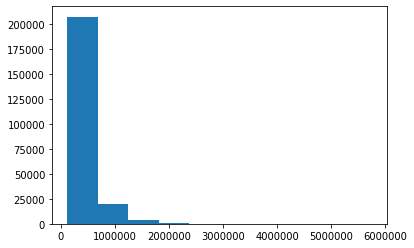

In [129]:
plt.hist(dat.streams) # histogram of streams
plt.show()

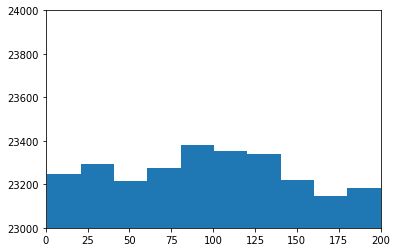

In [321]:
plt.hist(dat['rank']) # histogram of ranks
plt.axis([0, 200, 23000, 24000])
plt.show()

In [322]:
for date in dat.date.unique()[0:5]:
    ranks_on_date = np.asarray(dat['rank'][dat.date==date])
    one_to_twohund = np.asarray([(x+1) for x in range(200)])
    print('\nDate:', date)                   
    print('Number of ranks on the date:', len(ranks_on_date))
    print('Ranks on the date:', ranks_on_date[0:16])
    print('1-16:', one_to_twohund[0:16])
    print('Are these arrays the same?', np.array_equal(ranks_on_date, one_to_twohund))


Date: 2017-01-01
Number of ranks on the date: 187
Ranks on the date: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17]
1-16: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Are these arrays the same? False

Date: 2017-01-02
Number of ranks on the date: 191
Ranks on the date: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17]
1-16: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Are these arrays the same? False

Date: 2017-01-03
Number of ranks on the date: 191
Ranks on the date: [ 1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17]
1-16: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Are these arrays the same? False

Date: 2017-01-04
Number of ranks on the date: 191
Ranks on the date: [ 1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17]
1-16: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Are these arrays the same? False

Date: 2017-01-05
Number of ranks on the date: 191
Ranks on the date: [ 1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17]
1-16: [ 1  2  3  4  5  6  7  8  9 10 11 12 1

In [323]:
dat['streams'][0:20]

0     1371493
1     1180074
2     1064351
3     1010492
4      874289
5      763259
6      753150
7      714839
8      690483
9      682688
10     651807
11     574974
12     567789
13     544620
14     507450
15     485127
16     478503
17     456308
18     456291
19     449345
Name: streams, dtype: int32

In [205]:
slopes = dict(zip(list(dat.select_dtypes(exclude=['object']).drop(['streams'], axis=1)), list(lin_model.coef_)))
print('Slopes:', slopes)

print('\nIntercept:', lin_model.intercept_)
print('\n𝑟-squared:', lin_model.score(dat.select_dtypes(exclude=['object']).drop(['streams'], axis=1), dat.streams))

Slopes: {'rank': -3590.2383554629, 'danceability': 22512.004373524287, 'energy': -50710.56525444808, 'key': 441.02191914074467, 'loudness': 1286.8527518927194, 'mode': 1382.7064028018958, 'speechiness': -3983.301929993176, 'acousticness': -4481.520273436371, 'instrumentalness': 15289.974918885378, 'liveness': 87839.79589669261, 'valence': 16321.45461360426, 'tempo': 56.47140354284903, 'duration_ms': -0.059582060113821604, 'time_signature': 8392.705891271351}

Intercept: 729755.731418555

𝑟-squared: 0.5280443690355605


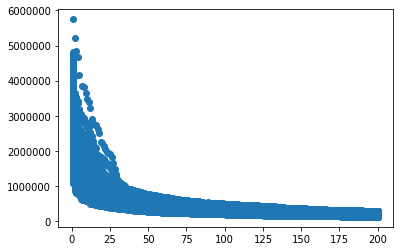

In [234]:
plt.scatter(dat['rank'], dat.streams) # scatterplot between rank of song on charts and number streams
plt.show()

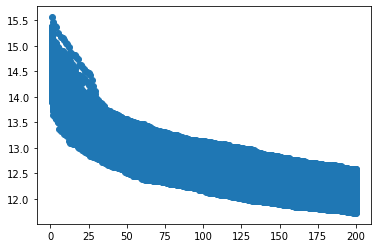

In [255]:
plt.scatter(dat['rank'], np.log(dat.streams)) # scatterplot between rank of song on charts and number streams
plt.show()

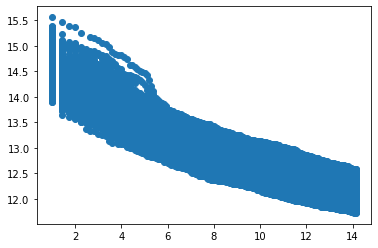

In [258]:
plt.scatter(np.sqrt(dat['rank']), np.log(dat.streams)) # scatterplot between rank of song on charts and number streams
plt.show()

In [238]:
# fit linear regression between all numeric features and number of streams
model = LinearRegression().fit(dat[['rank']], dat.streams)
model.score(dat[['rank']], dat.streams)

0.5261679612299878

In [244]:
# fit linear regression between all numeric features and number of streams
model = LinearRegression().fit(dat[['rank']], np.log(dat.streams))
model.score(dat[['rank']], np.log(dat.streams))

0.7998260558411527

In [259]:
# fit linear regression between all numeric features and number of streams
model = LinearRegression().fit(np.sqrt(dat[['rank']]), np.log(dat.streams))
model.score(np.sqrt(dat[['rank']]), np.log(dat.streams))

0.893059729089993

In [246]:
np.corrcoef(dat['rank'], dat.streams)[0][1]

-0.7253743593690006

In [247]:
dat.select_dtypes(exclude=['object']).corr()

,rank,streams,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
rank,1.000000,-0.725374,-0.082073,0.026753,0.016486,-0.014733,0.033848,-0.021824,0.020753,-0.009849,-0.010342,-0.000297,-0.011693,0.017551,-0.010853
streams,-0.725374,1.000000,0.073984,-0.029372,-0.007666,0.007965,-0.024407,0.020325,-0.016794,0.007850,0.040493,0.009627,0.010706,-0.025603,0.014374
danceability,-0.082073,0.073984,1.000000,-0.007346,-0.022046,0.062414,-0.078186,0.278774,-0.281587,-0.044502,-0.042182,0.221781,0.012143,-0.102714,0.104478
energy,0.026753,-0.029372,-0.007346,1.000000,0.011383,0.732943,0.005202,-0.055382,-0.454778,-0.107948,0.072688,0.359885,0.140339,0.055991,0.098199
key,0.016486,-0.007666,-0.022046,0.011383,1.000000,0.015579,-0.140678,-0.003623,0.018213,-0.028720,-0.035477,0.074902,-0.071554,-0.028798,-0.003422
loudness,-0.014733,0.007965,0.062414,0.732943,0.015579,1.000000,0.033017,-0.157528,-0.382269,-0.167856,0.017143,0.254720,0.094556,0.044162,0.094842
mode,0.033848,-0.024407,-0.078186,0.005202,-0.140678,0.033017,1.000000,-0.125352,0.009924,-0.018859,-0.012741,-0.011068,0.002786,0.032346,-0.020436
speechiness,-0.021824,0.020325,0.278774,-0.055382,-0.003623,-0.157528,-0.125352,1.000000,-0.137173,-0.036805,0.038285,0.015514,0.172082,-0.039734,0.061061
acousticness,0.020753,-0.016794,-0.281587,-0.454778,0.018213,-0.382269,0.009924,-0.137173,1.000000,0.116826,-0.070992,-0.053273,-0.159589,-0.062661,-0.079946
instrumentalness,-0.009849,0.007850,-0.044502,-0.107948,-0.028720,-0.167856,-0.018859,-0.036805,0.116826,1.000000,-0.007390,-0.101861,0.008375,0.042783,-0.038573


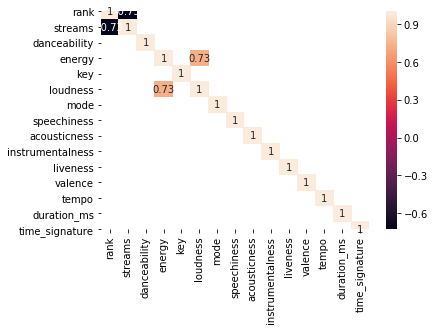

In [251]:
sn.heatmap(dat.select_dtypes(exclude=['object']).corr()[abs(dat.select_dtypes(exclude=['object']).corr()) > 0.5], annot=True)
plt.show()

#### potential questions
   
* number of streams for top song over time
* total number of streams per week over time
* how audio features for top songs have changed over time
* examine the relationship between audio features in popular songs
* cluster audio features (kmeans?) and visualize via pca or tsne, tooltip to see artist/song/#streams? maybe be able to make a 'genre' in this way
* change in danceability over time
* artists with most songs in top 10
* keywords in title and popularity
* likelihood-based methods?

In [466]:
artists_w_rank_one = dat.artist[dat['rank']==1]
print('Number of artists who have had a #1 song:', len(artists_w_rank_one.unique()))
print('\nArists and number of days for #1 songs:',dict(zip(Counter(artists_w_rank_one).keys(), Counter(artists_w_rank_one).values())))

Number of artists who have had a #1 song: 40

Arists and number of days for #1 songs: {'Migos': 29, 'Ed Sheeran': 55, 'Drake': 174, 'Kendrick Lamar': 64, 'Luis Fonsi': 46, 'Lil Uzi Vert': 15, 'DJ Khaled': 1, 'French Montana': 7, '21 Savage': 20, 'Taylor Swift': 23, 'Logic': 17, 'Post Malone': 214, 'Mariah Carey': 5, 'The Weeknd': 25, 'J. Cole': 18, 'Childish Gambino': 13, 'Kanye West': 19, 'Juice WRLD': 20, 'XXXTENTACION': 7, 'Travis Scott': 41, 'Eminem': 9, 'Lil Peep': 6, 'Lil Wayne': 7, 'Lil Baby': 7, 'Kodak Black': 16, 'Sheck Wes': 7, 'Ariana Grande': 81, 'Jonas Brothers': 11, 'Lil Nas X': 34, 'Billie Eilish': 24, 'Tyler, The Creator': 7, 'Young Thug': 3, 'Shawn Mendes': 26, 'Lil Tecca': 26, 'DaBaby': 1, 'Selena Gomez': 5, 'Arizona Zervas': 23, 'Harry Styles': 1, 'Roddy Ricch': 85, 'NAV': 1}


In [357]:
tot_num_artists = len(dat.artist.unique())
print('Total number of artists in dataset:', tot_num_artists)

Total number of artists in dataset: 785


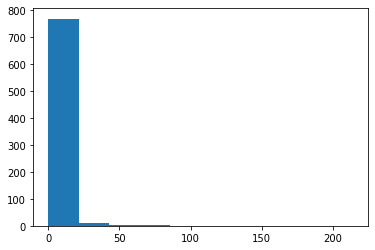

In [362]:
no_num_one_days = [0 for x in range(tot_num_artists - len(artists_w_rank_one.unique()))]
num_one_days = [x for x in Counter(artists_w_rank_one).values()]

plt.hist(no_num_one_days+num_one_days)
plt.show()

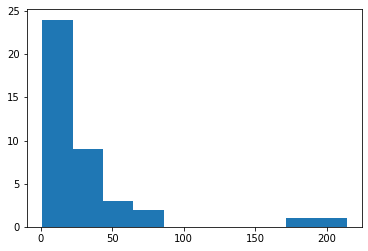

In [360]:
plt.hist(num_one_days)
plt.show()

In [412]:
# all number one songs

print('Songs that have reached #1:', dat.title[dat['rank']==1].unique())
print('\n Number of songs that have reached #1:', len(dat.title[dat['rank']==1].unique()))

Songs that have reached #1: ['Bad and Boujee (feat. Lil Uzi Vert)' 'Shape of You' 'Passionfruit'
 'HUMBLE.' 'Despacito - Remix' 'XO TOUR Llif3'
 'Wild Thoughts (feat. Rihanna & Bryson Tiller)' 'Unforgettable'
 'Bank Account' 'Look What You Made Me Do' '...Ready For It?'
 '1-800-273-8255' 'rockstar' 'All I Want for Christmas Is You'
 "God's Plan" 'Psycho (feat. Ty Dolla $ign)' 'Call Out My Name'
 'Nice For What' 'KOD' 'Paranoid' 'Better Now' 'This Is America'
 'All Mine' 'Lucid Dreams' 'SAD!' 'Nonstop' 'In My Feelings' 'STARGAZING'
 'SICKO MODE' 'Lucky You (feat. Joyner Lucas)' 'I Love It (& Lil Pump)'
 'New Patek' 'Falling Down - Bonus Track'
 'Mona Lisa (feat. Kendrick Lamar)'
 'Never Recover (Lil Baby & Gunna, Drake)'
 'Drip Too Hard (Lil Baby & Gunna)' 'ZEZE (feat. Travis Scott & Offset)'
 'Mo Bamba' 'thank u, next' 'whoa (mind in awe)'
 'Sunflower - Spider-Man: Into the Spider-Verse' 'Wow.' '7 rings'
 'MIDDLE CHILD' "break up with your girlfriend, i'm bored" 'Sucker'
 'Old Town Roa

In [438]:
# number of different number one songs by artist

artists = dat['artist'].groupby(dat.title[dat['rank']==1]).unique().apply(pd.Series)[0]
print('Number of different number one songs by artist:\n\n', dict(zip(Counter(artists).keys(), Counter(artists).values())))

Number of different number one songs by artist:

 {'Taylor Swift': 5, 'Logic': 2, 'Ariana Grande': 4, 'Harry Styles': 1, 'Mariah Carey': 1, 'Kanye West': 3, 'DaBaby': 1, 'Lil Uzi Vert': 5, 'Migos': 1, '21 Savage': 1, 'Post Malone': 8, 'The Weeknd': 3, 'Luis Fonsi': 1, 'Lil Baby': 2, 'Tyler, The Creator': 1, 'Lil Peep': 1, 'Drake': 7, 'Travis Scott': 3, 'Kendrick Lamar': 1, 'Ed Sheeran': 2, 'J. Cole': 2, 'Selena Gomez': 1, 'Juice WRLD': 1, 'Eminem': 1, 'Sheck Wes': 1, 'Lil Wayne': 1, 'Lil Nas X': 3, 'Arizona Zervas': 1, 'Lil Tecca': 1, 'XXXTENTACION': 2, 'Shawn Mendes': 1, 'Jonas Brothers': 1, 'Roddy Ricch': 1, 'Young Thug': 1, 'Childish Gambino': 1, 'NAV': 1, 'French Montana': 1, 'DJ Khaled': 1, 'Kodak Black': 1, 'Billie Eilish': 2}


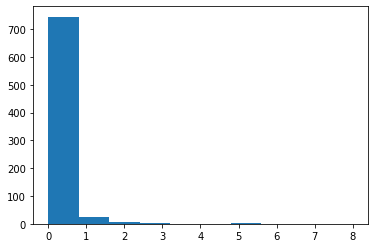

In [439]:
# how many #1 songs does an artist in the dataset have?

tot_num_artists = len(dat.artist.unique())
no_num_one_songs_by_art = [0 for x in range(tot_num_artists - len(artists.unique()))]
num_one_songs_by_art = [x for x in Counter(artists).values()]

plt.hist(no_num_one_songs_by_art+num_one_songs_by_art)
plt.show()

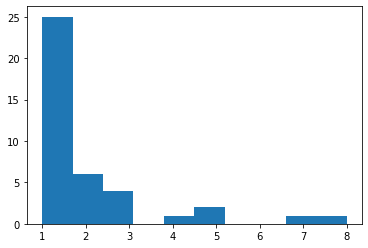

In [440]:
# if an artist has at least one #1 song, how many do they have?

plt.hist(num_one_songs_by_art)
plt.show()

The log-likelihoods for each of the Poisson models are listed as follows: [-83.2087225399946, -69.14324245631886, -77.51696402388205, -95.07776237264319, -117.67256537013472, -143.45148394020634, -171.42773091368025, -201.01228228896733].


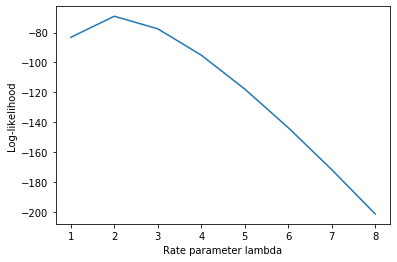

In [448]:
data = num_one_songs_by_art
rate = list(range(1,9))
n = len(data)

def log_likelihood_poisson(x, n, intensity):
    x = np.array(x)
    loglik = -n*intensity + sum(x*np.log(intensity) - np.log(scipy.special.factorial(x)))
    return loglik

loglik = []
for intensity in rate:
    loglik.append(log_likelihood_poisson(data, n, intensity))
    
print('The log-likelihoods for each of the Poisson models are listed as follows: {}.'.format(loglik))

line_graph = plt.plot(rate, loglik)
plt.xlabel('Rate parameter lambda')
plt.ylabel('Log-likelihood')
plt.show()

The log-likelihoods for each of the Geometric models are listed as follows: [-96.10710331475921, -72.85697144730398, -61.71256004270928, -56.06300297807384, -54.06548008367574, -55.25207276185752, -60.01796432193486, -70.08438272506422, -91.7126541600868].


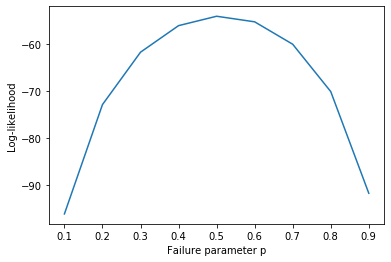

In [463]:
data = num_one_songs_by_art
p_vals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
n = len(data)

def log_likelihood_geometric(x, n, p):
    ##pmf: p(X=k) = p*(1-p)^(k-1)
    x = np.array(x)
    loglik = n*np.log(p) + np.log(1-p)*sum(x-1)
    return loglik

loglik = []
for p in p_vals:
    loglik.append(log_likelihood_geometric(data, n, p))
    
print('The log-likelihoods for each of the Geometric models are listed as follows: {}.'.format(loglik))

line_graph = plt.plot(p_vals, loglik)
plt.xlabel('Failure parameter p')
plt.ylabel('Log-likelihood')
plt.show()

* We model the number of number one songs artists are most likely to achieve (assuming they get at least one) as following a Geometric distribution with probability of failure 0.5. This is because there is no clear maximum to the number of number one songs artists can have to reach number one and the log-likelihood is maximized at $p$=0.5. More intuitively, we are modelling the number of additional number one songs an artist gets, essentially, as a coin flip. Note that there are a couple of downfalls with using this model, such as the lack of independence between whether or not an artist will get another number one song and the probability of getting another number one song being the same after each additional song (since more popular artists more likely to get a lot and less popular artists more likely to get none).

In [467]:
# plt.scatter(num_one_songs_by_art, num_one_days)
print('Number of different number one songs by artist:\n\n', dict(zip(Counter(artists).keys(), Counter(artists).values())))
print('\nArists and number of days for #1 songs:',dict(zip(Counter(artists_w_rank_one).keys(), Counter(artists_w_rank_one).values())))

Number of different number one songs by artist:

 {'Taylor Swift': 5, 'Logic': 2, 'Ariana Grande': 4, 'Harry Styles': 1, 'Mariah Carey': 1, 'Kanye West': 3, 'DaBaby': 1, 'Lil Uzi Vert': 5, 'Migos': 1, '21 Savage': 1, 'Post Malone': 8, 'The Weeknd': 3, 'Luis Fonsi': 1, 'Lil Baby': 2, 'Tyler, The Creator': 1, 'Lil Peep': 1, 'Drake': 7, 'Travis Scott': 3, 'Kendrick Lamar': 1, 'Ed Sheeran': 2, 'J. Cole': 2, 'Selena Gomez': 1, 'Juice WRLD': 1, 'Eminem': 1, 'Sheck Wes': 1, 'Lil Wayne': 1, 'Lil Nas X': 3, 'Arizona Zervas': 1, 'Lil Tecca': 1, 'XXXTENTACION': 2, 'Shawn Mendes': 1, 'Jonas Brothers': 1, 'Roddy Ricch': 1, 'Young Thug': 1, 'Childish Gambino': 1, 'NAV': 1, 'French Montana': 1, 'DJ Khaled': 1, 'Kodak Black': 1, 'Billie Eilish': 2}

Arists and number of days for #1 songs: {'Migos': 29, 'Ed Sheeran': 55, 'Drake': 174, 'Kendrick Lamar': 64, 'Luis Fonsi': 46, 'Lil Uzi Vert': 15, 'DJ Khaled': 1, 'French Montana': 7, '21 Savage': 20, 'Taylor Swift': 23, 'Logic': 17, 'Post Malone': 214, 'Ma

In [471]:
# number of days each song at #1
num_one_songs = dat.title[dat['rank']==1]
print('Number of days each song at number one:\n\n', dict(zip(Counter(num_one_songs).keys(), Counter(num_one_songs).values())))

Number of days each song at number one:

 {'Bad and Boujee (feat. Lil Uzi Vert)': 29, 'Shape of You': 48, 'Passionfruit': 12, 'HUMBLE.': 64, 'Despacito - Remix': 46, 'XO TOUR Llif3': 4, 'Wild Thoughts (feat. Rihanna & Bryson Tiller)': 1, 'Unforgettable': 7, 'Bank Account': 20, 'Look What You Made Me Do': 10, '...Ready For It?': 2, '1-800-273-8255': 10, 'rockstar': 124, 'All I Want for Christmas Is You': 5, "God's Plan": 70, 'Psycho (feat. Ty Dolla $ign)': 1, 'Call Out My Name': 6, 'Nice For What': 32, 'KOD': 2, 'Paranoid': 1, 'Better Now': 8, 'This Is America': 13, 'All Mine': 4, 'Lucid Dreams': 20, 'SAD!': 6, 'Nonstop': 7, 'In My Feelings': 37, 'STARGAZING': 1, 'SICKO MODE': 19, 'Lucky You (feat. Joyner Lucas)': 9, 'I Love It (& Lil Pump)': 11, 'New Patek': 1, 'Falling Down - Bonus Track': 6, 'Mona Lisa (feat. Kendrick Lamar)': 7, 'Never Recover (Lil Baby & Gunna, Drake)': 1, 'Drip Too Hard (Lil Baby & Gunna)': 6, 'ZEZE (feat. Travis Scott & Offset)': 16, 'Mo Bamba': 7, 'thank u, next

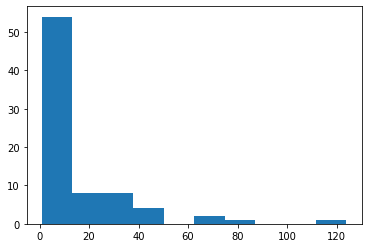

In [474]:
plt.hist(Counter(num_one_songs).values())
plt.show()

The log-likelihoods for each of the Geometric models are listed as follows: [-370.4093989837252, -290.8591405793302, -297.0786122120119, -329.1839652111178, -374.3412168852036, -428.89647095108717, -491.6024412291097].


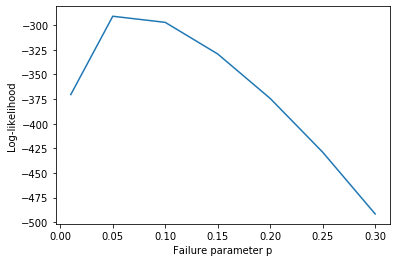

In [489]:
data = list(Counter(num_one_songs).values())
p_vals = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
n = len(data)

def log_likelihood_geometric(x, n, p):
    ##pmf: p(X=k) = p*(1-p)^(k-1)
    x = np.array(x)
    loglik = n*np.log(p) + np.log(1-p)*sum(x-1)
    return loglik

loglik = []
for p in p_vals:
    loglik.append(log_likelihood_geometric(data, n, p))
    
print('The log-likelihoods for each of the Geometric models are listed as follows: {}.'.format(loglik))

line_graph = plt.plot(p_vals, loglik)
plt.xlabel('Failure parameter p')
plt.ylabel('Log-likelihood')
plt.show()

The log-likelihoods for each of the Poisson models are listed as follows: [-1001.25565940659, -965.5506149000306, -939.7460421514022, -922.2550918968734, -911.8442811174834, -907.5357854335502, -908.5413297164278, -914.2161558894209, -924.0261681783625, -937.5239732029236, -954.3310729985758].


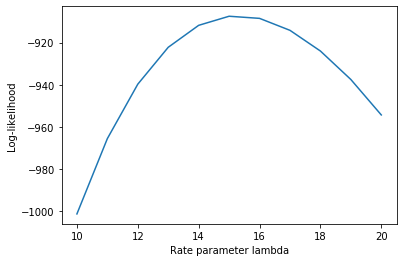

In [485]:
data = list(Counter(num_one_songs).values())
rate = list(range(10,21))
n = len(data)

def log_likelihood_poisson(x, n, intensity):
    x = np.array(x)
    loglik = -n*intensity + sum(x*np.log(intensity) - np.log(scipy.special.factorial(x)))
    return loglik

loglik = []
for intensity in rate:
    loglik.append(log_likelihood_poisson(data, n, intensity))
    
print('The log-likelihoods for each of the Poisson models are listed as follows: {}.'.format(loglik))

line_graph = plt.plot(rate, loglik)
plt.xlabel('Rate parameter lambda')
plt.ylabel('Log-likelihood')
plt.show()

looking for keywords in title

In [591]:
# all number one songs
# num_one_songs = np.asarray([x.lower() for x in dat.title[dat['rank']==1].unique()]) # lowercase all songs
num_one_songs = np.asarray([x.lower() for x in dat.title.unique()]) # lowercase all songs
num_one_songs

array(['bad and boujee (feat. lil uzi vert)', 'fake love', 'starboy', ...,
       'why are sundays so depressing', 'adidas', 'costa rica'],
      dtype='<U139')

In [592]:
num_one_songs = np.asarray([re.sub(r'\([^)]*\)', '', x) for x in num_one_songs]) # get rid of parentheses in order to remove featured artists
num_one_songs

array(['bad and boujee ', 'fake love', 'starboy', ...,
       'why are sundays so depressing', 'adidas', 'costa rica'],
      dtype='<U89')

In [597]:
num_one_songs = [re.findall(r'\b\w+\b',x) for x in num_one_songs] # extract words from each song
num_one_songs

[['bad', 'and', 'boujee'],
 ['fake', 'love'],
 ['starboy'],
 ['closer'],
 ['black', 'beatles'],
 ['broccoli'],
 ['one', 'dance'],
 ['caroline'],
 ['let', 'me', 'love', 'you'],
 ['bounce', 'back'],
 ['i', 'feel', 'it', 'coming'],
 ['24k', 'magic'],
 ['bad', 'things'],
 ['x'],
 ['i',
  'don',
  't',
  'wanna',
  'live',
  'forever',
  'from',
  'fifty',
  'shades',
  'darker'],
 ['chill', 'bill'],
 ['deja', 'vu'],
 ['ooouuu'],
 ['party', 'monster'],
 ['no', 'problem'],
 ['no', 'heart'],
 ['starving'],
 ['side', 'to', 'side'],
 ['treat', 'you', 'better'],
 ['in', 'the', 'name', 'of', 'love'],
 ['sneakin'],
 ['work', 'from', 'home'],
 ['heathens'],
 ['you', 'was', 'right'],
 ['into', 'you'],
 ['too', 'good'],
 ['controlla'],
 ['this', 'is', 'what', 'you', 'came', 'for'],
 ['say', 'you', 'won', 't', 'let', 'go'],
 ['all', 'we', 'know'],
 ['pick', 'up', 'the', 'phone'],
 ['ispy'],
 ['cheap', 'thrills'],
 ['needed', 'me'],
 ['panda'],
 ['scars', 'to', 'your', 'beautiful'],
 ['mercy'],
 ['neig

In [598]:
words_num_one_songs = (list(chain.from_iterable(num_one_songs))) # get each word sepearately
words_num_one_songs[0:5]

['bad', 'and', 'boujee', 'fake', 'love']

In [599]:
print(dict(zip(Counter(words_num_one_songs).keys(), Counter(words_num_one_songs).values())))

{'bad': 38, 'and': 42, 'boujee': 1, 'fake': 4, 'love': 135, 'starboy': 1, 'closer': 4, 'black': 18, 'beatles': 1, 'broccoli': 1, 'one': 35, 'dance': 13, 'caroline': 1, 'let': 34, 'me': 227, 'you': 229, 'bounce': 2, 'back': 37, 'i': 202, 'feel': 23, 'it': 146, 'coming': 6, '24k': 1, 'magic': 6, 'things': 14, 'x': 12, 'don': 30, 't': 66, 'wanna': 9, 'live': 9, 'forever': 15, 'from': 41, 'fifty': 3, 'shades': 3, 'darker': 2, 'chill': 3, 'bill': 2, 'deja': 1, 'vu': 2, 'ooouuu': 1, 'party': 14, 'monster': 4, 'no': 65, 'problem': 1, 'heart': 19, 'starving': 1, 'side': 10, 'to': 113, 'treat': 2, 'better': 18, 'in': 111, 'the': 366, 'name': 7, 'of': 89, 'sneakin': 1, 'work': 9, 'home': 16, 'heathens': 1, 'was': 8, 'right': 19, 'into': 9, 'too': 21, 'good': 39, 'controlla': 1, 'this': 43, 'is': 46, 'what': 50, 'came': 5, 'for': 64, 'say': 15, 'won': 5, 'go': 35, 'all': 50, 'we': 29, 'know': 27, 'pick': 3, 'up': 89, 'phone': 2, 'ispy': 1, 'cheap': 1, 'thrills': 1, 'needed': 1, 'panda': 1, 'scars

In [615]:
word_dict = dict(zip(Counter(words_num_one_songs).keys(), Counter(words_num_one_songs).values()))

word_list = []
[word_list.append([w, word_dict[w]]) for w in sorted(word_dict, key=word_dict.get, reverse=True)]

word_list[0:25]

[['the', 366],
 ['you', 229],
 ['me', 227],
 ['i', 202],
 ['it', 146],
 ['love', 135],
 ['a', 125],
 ['my', 118],
 ['to', 113],
 ['in', 111],
 ['on', 102],
 ['s', 91],
 ['of', 89],
 ['up', 89],
 ['remix', 78],
 ['t', 66],
 ['no', 65],
 ['for', 64],
 ['out', 55],
 ['like', 53],
 ['christmas', 53],
 ['what', 50],
 ['all', 50],
 ['is', 46],
 ['time', 46]]

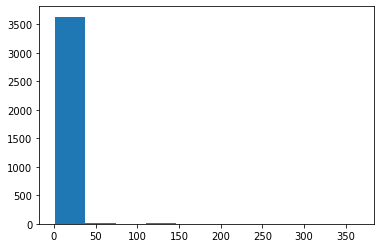

In [625]:
word_freq = np.asarray([value for word, value in word_list])

plt.hist(word_freq)
plt.show()

In [631]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup

In [632]:
url = 'https://www.rypeapp.com/most-common-english-words/' #100 most common english words
response = requests.get(url)

In [633]:
response

<Response [200]>

In [637]:
soup = BeautifulSoup(response.text, 'html.parser')

In [645]:
len(soup.findAll('td'))
soup.findAll('td')[0:5]

[<td nowrap="nowrap" valign="bottom" width="90">1. the</td>,
 <td nowrap="nowrap" valign="bottom" width="90">21. at</td>,
 <td nowrap="nowrap" valign="bottom" width="90">41. there</td>,
 <td nowrap="nowrap" valign="bottom" width="100">61. some</td>,
 <td nowrap="nowrap" valign="bottom" width="90">81. my</td>]

In [677]:
rank = []
word = []

for text in soup.findAll('td'):
    rank.append(re.findall(r'[0-9]+', text.get_text()))
    word.append(re.findall(r'[a-zA-Z]+', text.get_text()))

In [683]:
print(rank[0:5])
print(word[0:5])
rank = (list(chain.from_iterable(rank)))
word = (list(chain.from_iterable(word)))

[['1'], ['21'], ['41'], ['61'], ['81']]
[['the'], ['at'], ['there'], ['some'], ['my']]


In [724]:
common_words_dict = dict(zip(np.asarray(rank).astype(int), word))
common_words_dict

{1: 'the',
 21: 'at',
 41: 'there',
 61: 'some',
 81: 'my',
 2: 'of',
 22: 'be',
 42: 'use',
 62: 'her',
 82: 'than',
 3: 'and',
 23: 'this',
 43: 'an',
 63: 'would',
 83: 'first',
 4: 'a',
 24: 'have',
 44: 'each',
 64: 'make',
 84: 'water',
 5: 'to',
 25: 'from',
 45: 'which',
 65: 'like',
 85: 'been',
 6: 'in',
 26: 'or',
 46: 'she',
 66: 'him',
 86: 'call',
 7: 'is',
 27: 'one',
 47: 'do',
 67: 'into',
 87: 'who',
 8: 'you',
 28: 'had',
 48: 'how',
 68: 'time',
 88: 'oil',
 9: 'that',
 29: 'by',
 49: 'their',
 69: 'has',
 89: 'its',
 10: 'it',
 30: 'word',
 50: 'if',
 70: 'look',
 90: 'now',
 11: 'he',
 31: 'but',
 51: 'will',
 71: 'two',
 91: 'find',
 12: 'was',
 32: 'not',
 52: 'up',
 72: 'more',
 92: 'long',
 13: 'for',
 33: 'what',
 53: 'other',
 73: 'write',
 93: 'down',
 14: 'on',
 34: 'all',
 54: 'about',
 74: 'go',
 94: 'day',
 15: 'are',
 35: 'were',
 55: 'out',
 75: 'see',
 95: 'did',
 16: 'as',
 36: 'we',
 56: 'many',
 76: 'number',
 96: 'get',
 17: 'with',
 37: 'when',


In [698]:
common_word_list = []
[common_word_list.append([w, common_words_dict[w]]) for w in sorted(common_words_dict)]
common_word_list[0:25]

[[1, 'the'],
 [2, 'of'],
 [3, 'and'],
 [4, 'a'],
 [5, 'to'],
 [6, 'in'],
 [7, 'is'],
 [8, 'you'],
 [9, 'that'],
 [10, 'it'],
 [11, 'he'],
 [12, 'was'],
 [13, 'for'],
 [14, 'on'],
 [15, 'are'],
 [16, 'as'],
 [17, 'with'],
 [18, 'his'],
 [19, 'they'],
 [20, 'I'],
 [21, 'at'],
 [22, 'be'],
 [23, 'this'],
 [24, 'have'],
 [25, 'from']]

In [703]:
most_words_songs = np.asarray([word for word,count in word_list])

In [727]:
most_words_english = np.char.lower(np.asarray([word for count,word in common_word_list]))

In [728]:
print(most_words_songs[0:14])
print(most_words_english[0:14])

['the' 'you' 'me' 'i' 'it' 'love' 'a' 'my' 'to' 'in' 'on' 's' 'of' 'up']
['the' 'of' 'and' 'a' 'to' 'in' 'is' 'you' 'that' 'it' 'he' 'was' 'for'
 'on']


In [776]:
# ~np.in1d(most_words_songs, most_words_english) # indices where most_words_songs[ix] is NOT in most_words_english

[word for word in most_words_songs[~np.in1d(most_words_songs, most_words_english)]][0:38] # top 20 most commonly used words in songs that do not appear in the top 100 most used words in english

['me',
 'love',
 's',
 'remix',
 't',
 'christmas',
 'good',
 'bad',
 'back',
 'let',
 'off',
 'don',
 'life',
 '2',
 'u',
 'know',
 'big',
 'girl',
 'feat',
 'night',
 'never',
 'new',
 'feel',
 'man',
 'too',
 'god',
 'la',
 'money',
 'talk',
 'm',
 'heart',
 'right',
 'want',
 'remastered',
 'summer',
 'baby',
 'boy',
 'black']

In [779]:
# top 30 most commonly used words in songs that do not appear in the top 100 most used words in english
## we also remove words that were part of contractions, numbers, and 'feat' (means featuring artist)

song_words = [word for word in np.take([word for word in most_words_songs[~np.in1d(most_words_songs, most_words_english)]],[0,1,3,5,6,7,8,9,10,12,15,16,17,19,20,21,22,23,24,25,27,28,30,31,32,33,34,35,36,37])]

In [780]:
print('Top 30 words in song titles which are not most common words in English language:\n\n',song_words)

Top 30 words in song titles which are not most common words in English language:

 ['me', 'love', 'remix', 'christmas', 'good', 'bad', 'back', 'let', 'off', 'life', 'know', 'big', 'girl', 'night', 'never', 'new', 'feel', 'man', 'too', 'god', 'money', 'talk', 'heart', 'right', 'want', 'remastered', 'summer', 'baby', 'boy', 'black']


###### Notable words:
* __infatuated__ -- love, heart, girl, baby (note: I manually went through song titles and saw that 'man' and 'boy' usually were not love-type songs)
* __seasonal__ -- christmas, summer
* __musical__ -- remix, remastered
* __profound__ -- life, god
* __enjoyment__ -- night, money

In [783]:
[print(title) for title in dat.title.unique()]

Bad and Boujee (feat. Lil Uzi Vert)
Fake Love
Starboy
Closer
Black Beatles
Broccoli (feat. Lil Yachty)
One Dance
Caroline
Let Me Love You
Bounce Back
I Feel It Coming
24K Magic
Bad Things (with Camila Cabello)
X (feat. Future)
I Don’t Wanna Live Forever (Fifty Shades Darker) - From "Fifty Shades Darker (Original Motion Picture Soundtrack)"
Chill Bill (feat. J. Davi$ & Spooks)
Deja Vu
OOOUUU
Party Monster
No Problem (feat. Lil Wayne & 2 Chainz)
No Heart
Starving
Side To Side
Treat You Better
In the Name of Love
Sneakin’
Work from Home (feat. Ty Dolla $ign)
Heathens
You Was Right
Into You
Too Good
Controlla
This Is What You Came For
Say You Won't Let Go
All We Know
pick up the phone
iSpy (feat. Lil Yachty)
Cheap Thrills
Needed Me
Panda
Scars To Your Beautiful
Mercy
Neighbors
Work
Swang
Six Feet Under
Send My Love (To Your New Lover)
Love Me Now
Love Yourself
Juju On That Beat (TZ Anthem)
Jumpman
Sidewalks
I Want You Back
Cake By The Ocean
Low Life (feat. The Weeknd)
goosebumps
Redbone
Ju

The Long Way
Psycho (feat. Ty Dolla $ign)
44 More
RONDO
BILLY
Make Me Feel
Next To Me
93
Like I Do
DOOWEE
GUMMO - Remix
How I Feel
BUBA
Call If You Need Me
CHOCOLATÉ
Gone
MOOKY
Saturday Sun
Take Your Time
Beautiful
Powerglide (feat. Juicy J)
SAD!
Top Off (feat. JAY Z, Future & Beyoncé)
changes
Solitaire (feat. Migos & Lil Yachty)
Put Me Back Together (feat. Kiiara)
Old Friends x New Foes
Pieces (feat. 50 Cent)
My Enemy
No Excuses
Hate To Say
Singles You Up
Mad Love
1, 2, 3 (feat. Jason Derulo & De La Ghetto)
Breathe
Africa
Contra
Overnight
Wassup
Indica Badu
Yuck
BoomTrap Protocol
Midnight
Warm It Up
Wizard Of Oz
Grandpa's Space Ship
State Of Emergency
66
BOOM!
TALK TO ME NICE
BABY DADDY
NBAYOUNGBOAT
SELF MADE
OOPS
she ready
GET MONEY BROS.
COUNT ME IN
MICKEY
love me forever
DAS CAP
FWM
POP OUT
FLEX
WHOLE lotta GUAP
Fly
123 (with Murda Beatz)
Personal
1950
Nevermind
One Number Away
Freaky Friday (feat. Chris Brown)
Sit Next to Me - Stereotypes Remix
Moonlight
NUMB
the remedy for a brok

Talk
break up with your girlfriend, i'm bored
needy
NASA
bloodline
bad idea
fake smile
ghostin
in my head
make up
Who Do You Love
Better When You're Gone
One Last Time
BLACKJACK (feat. YBN Cordae) - Remix
Con Calma
Butterflies
Slow Burn
Space Cowboy
Speed It Up
Big Plans
Robbery
Red Room
If I Ain't Got You
Please Me
11 Minutes (with Halsey feat. Travis Barker)
365
Think About You
Never Go Back
Best I Ever Had
1 SIDED LOVE
Lust For Life
Houstatlantavegas
Successful (feat. Trey Songz & Lil Wayne)
Dumb Blonde (feat. Nicki Minaj)
Talk You Out Of It
November 18th
Last Hurrah
Ignant Shit (feat. Lil Wayne)
I Don’t Even Know You Anymore (feat. Bazzi & Lil Wayne)
Let’s Call It Off (feat. Peter Bjorn and John)
U & Us
Thotiana (REMIX feat. YG)
Legacy (feat. Travis Scott & 21 Savage)
Outstanding
How Did I Get Here (feat. J. Cole)
I Guess I Just Feel Like
Be Like Me (feat. Lil Wayne)
Clout (feat. Cardi B)
Wit It
Wild Wild West (feat. Gunna)
Lick
3 Headed Snake (feat. Young Thug)
Same Yung Nigga (fe

Suited Panamera (feat. Quando Rondo)
Bat Man
Long RD
Bad Bad
YES! (feat. Rich The Kid & K CAMP)
How You Want It
The Birthday Party
Okay
Call Me Late
SHUT UP
Roses - Imanbek Remix
The Other Side (from Trolls World Tour)
Like That (feat. Gucci Mane)
Stupid Love
Heatin Up (feat. Gunna)
Live Off My Closet (feat. Future)
Commercial (feat. Lil Uzi Vert)
Get Ugly
How
Grace (feat. 42 Dugg)
Emotionally Scarred
Forever (feat. Lil Wayne)
Same Thing
No Sucker (feat. Moneybagg Yo)
PTSD
We Should (feat. Young Thug)
Someone Said
Consistent
Catch The Sun - From "Queen & Slim: The Soundtrack"
Rojo
Forget That (feat. Rylo Rodriguez)
not ur friend
Gang Signs
Shimmy
Happiness Over Everything (H.O.E.) (feat. Future & Miguel)
Hurtin
Solid
Drown (feat. Clinton Kane)
Crusade
Cruel Intentions
La Difícil
Si Veo a Tu Mamá
La Santa
Pero Ya No
Yo Perreo Sola
Bichiyal
Soliá
La Zona
Que Malo
Safaera
Está Cabrón Ser Yo
A Tu Merced
25/8
Una Vez
P FKN R
<3
Puesto Pa' Guerrial
Hablamos Mañana
100 Shots
That Way
Supalone

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,